In [21]:
from PIL import Image
import cv2
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import os
import seaborn as sns

In [12]:
df = pd.read_csv("data/Training_set.csv")
file_names = df.iloc[:, 0].tolist()

In [17]:
heights = []
widths = []
for file_name in file_names:
    try:
        with Image.open(f"data/train/{file_name}") as img:
            width, height = img.size
            heights.append(height)
            widths.append(width)
    except FileNotFoundError:
        heights.append(None)
        widths.append(None)
        print(file_name + " is not available")
        continue

In [18]:
df['height'] = heights
df['width'] = widths

<Axes: xlabel='height', ylabel='Count'>

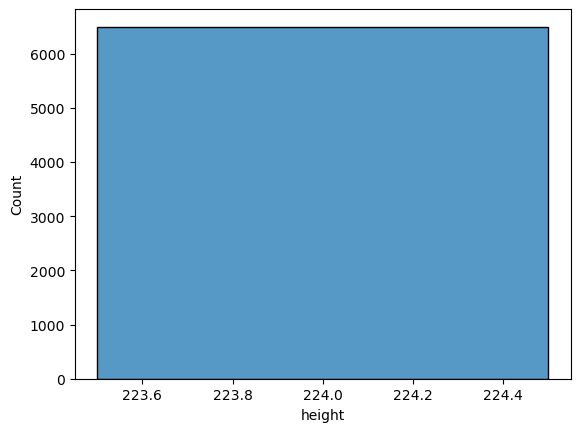

In [22]:
sns.histplot(df['height'])

<Axes: xlabel='width', ylabel='Count'>

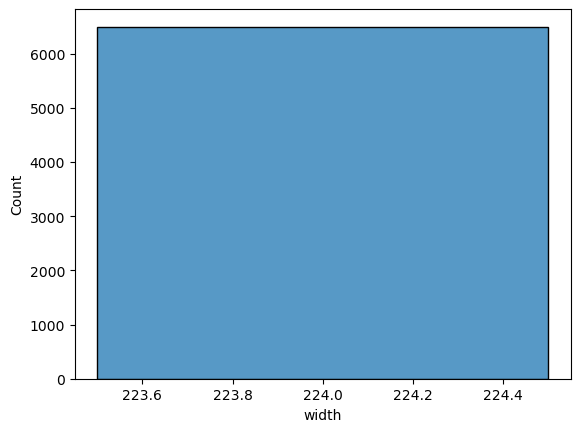

In [23]:
sns.histplot(df['width'])

In [28]:
blues = []
greens = []
reds = []

for file_name in file_names:
    try:
        img = cv2.imread(f"data/train/{file_name}")
        b_channel, g_channel, r_channel = cv2.split(img)
        blues.append(b_channel)
        greens.append(g_channel)
        reds.append(r_channel)
    except:
        print(file_name + " is not available")
        continue

greens = np.stack(greens, axis=0)
blues = np.stack(blues, axis=0)
reds = np.stack(reds, axis=0)

var_per_pixel_green = greens.var(axis=0)
var_per_pixel_blue = blues.var(axis=0)
var_per_pixel_red = reds.var(axis=0)


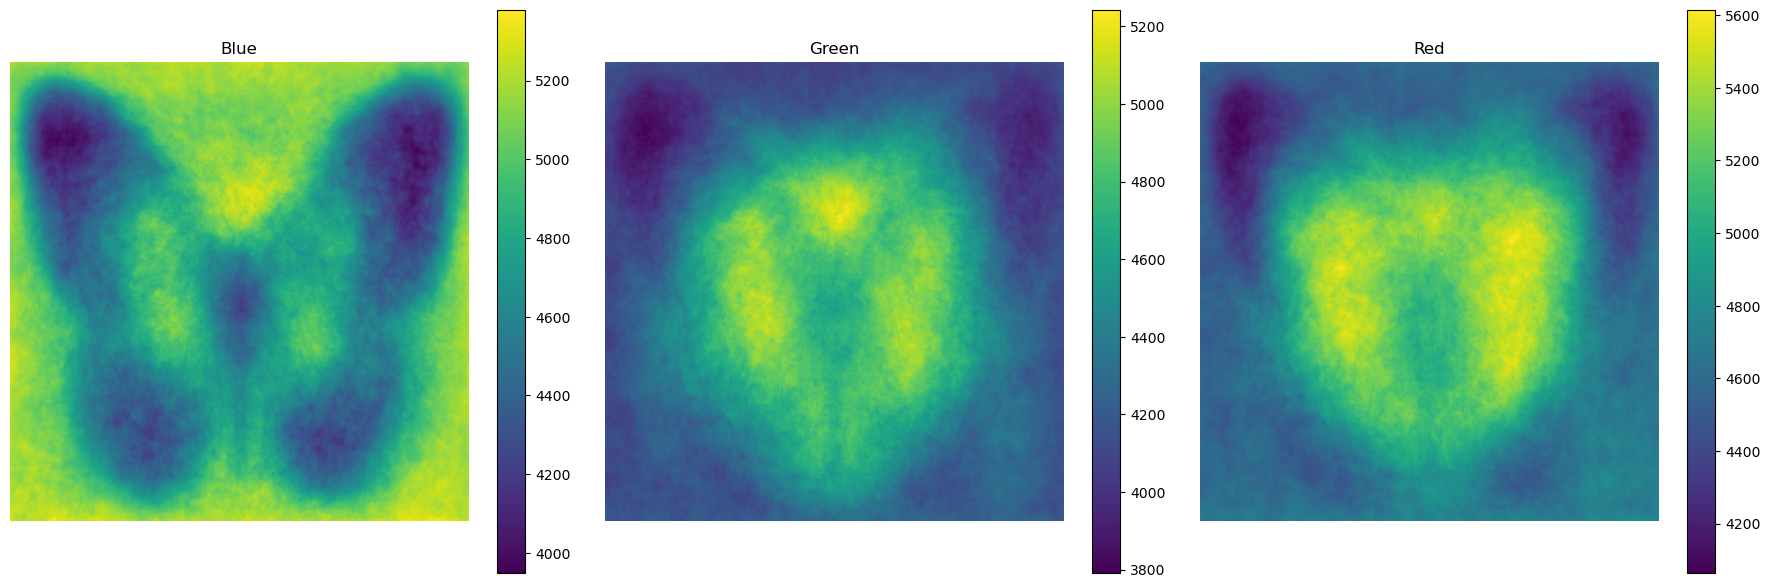

In [32]:
fig, axes = plt.subplots(1, 3, figsize=(18,6))
axes[0].imshow(var_per_pixel_blue, aspect='equal')
axes[0].set_title('Blue')
axes[0].axis('off')
fig.colorbar(axes[0].images[0], ax=axes[0])

axes[1].imshow(var_per_pixel_green, aspect='equal')
axes[1].set_title('Green')
axes[1].axis('off')
fig.colorbar(axes[1].images[0], ax=axes[1])

axes[2].imshow(var_per_pixel_red, aspect='equal')
axes[2].set_title('Red')
axes[2].axis('off')
fig.colorbar(axes[2].images[0], ax=axes[2])

plt.tight_layout()
plt.show()